In [2]:
import pandas as pd
import numpy as np
OAI = pd.read_csv("Online.csv")
TFI = pd.read_csv("transfer.csv")
CTI = pd.read_csv("Customer.csv")
PDI = pd.read_csv("ProductInfo.csv")
CTI1 = CTI[CTI["clnt_gender"]!="unknown"]

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 연령 별

In [2]:
cti = CTI1
cti["count"] = 1
cti_group = pd.pivot_table(cti,index="clnt_gender",columns="clnt_age",values="count",aggfunc=np.sum)
cti_group

clnt_age,10-20,30,40,50-60
clnt_gender,,,,
F,796,3680,4200,1676
M,174,627,748,344


# 연령 성별 검색어

In [3]:
merge2 = OAI.merge(CTI1,how = "inner", on="clnt_id")
merge2 = merge2[merge2["sech_kwd"].notnull()]
merge2

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,count
15,28304,1,13,0,A03,20190716,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50-60,1
16,28304,1,11,0,A03,20190716,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50-60,1
17,28304,1,16,0,A03,20190716,11:37,976904,NaN,고메핫도그,56.0,1303.0,PUSH,mobile_web,F,50-60,1
18,28304,1,10,0,A03,20190716,11:34,786138,NaN,핫도그,56.0,1303.0,PUSH,mobile_web,F,50-60,1
19,28304,1,9,0,A03,20190716,11:34,759117,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50-60,1
20,28304,1,18,0,A03,20190716,11:38,1015222,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50-60,1
1359,49353,28,14,0,A03,20190813,12:13,227981,NaN,서울우유,73.0,1418.0,PUSH,NaN,F,30,1
1360,49353,43,12,0,A03,20190825,19:49,649114,NaN,초코우유,18.0,754.0,PUSH,NaN,F,30,1
1361,49353,37,5,0,A03,20190821,19:49,60577,NaN,유료회원,12.0,113.0,PUSH,NaN,F,30,1
1362,49353,71,42,0,A03,20190923,14:53,892930,NaN,계란말이,51.0,1722.0,PUSH,NaN,F,30,1


In [4]:
mer = merge2[["sech_kwd","clnt_gender","clnt_age"]]

In [5]:
mat1 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="10-20")]
mat2 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="30")]
mat3 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="40")]
mat4 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="50-60")]
mat5 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="10-20")]
mat6 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="30")]
mat7 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="40")]
mat8 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="50-60")]
mat1

,sech_kwd,clnt_gender,clnt_age
3496,anf,F,10-20
3497,식혜,F,10-20
3498,샐러드,F,10-20
3499,생수,F,10-20
3500,생수,F,10-20
3501,샐러드,F,10-20
3502,쾌변,F,10-20
3503,식혜,F,10-20
3504,식혜,F,10-20
3505,todtn,F,10-20


In [6]:
oai1 = OAI[["sech_kwd","trfc_src","dvc_ctg_nm"]]
oai1 = oai1[(oai1["sech_kwd"].notnull())&(oai1["dvc_ctg_nm"].notnull())]
oai1 = oai1[oai1["dvc_ctg_nm"]!="unknown"]
oai1["count"] = 1
oai1.shape

(348267, 4)

In [45]:
oai_pivot = pd.pivot_table(oai1, index='trfc_src', columns='dvc_ctg_nm', values='count',aggfunc=np.sum)
oai_pivot

dvc_ctg_nm,PC,mobile_app,mobile_web
trfc_src,,,
DIRECT,29947.0,305.0,36518.0
PORTAL_1,7983.0,NaN,8600.0
PORTAL_2,5160.0,NaN,2011.0
PORTAL_3,1276.0,NaN,1311.0
PUSH,17.0,NaN,25039.0
WEBSITE,7198.0,156.0,2777.0
unknown,17254.0,155276.0,47439.0


# 요일별 판매량/판매수

In [8]:
TFI[TFI["de_dt"]==20190917].sort_values(by = "buy_am", ascending=False).head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
552782,46019,102920,1,A02,1504,20190917,22:42,2890600,2
569497,8810,102604,1,A01,493,20190917,12:29,2370000,1
551515,61923,102845,1,A02,1636,20190917,15:21,1909610,1
558654,9678,102785,1,A02,742,20190917,11:00,1814100,3
562192,71346,102717,1,A02,593,20190917,02:01,1326780,9


In [9]:
tfi1 = TFI[["de_dt","buy_am","buy_ct"]]
tfi1['de_dt'] = pd.to_datetime(tfi1['de_dt'], format='%Y%m%d')
tfi1['day_of_week'] = tfi1["de_dt"].dt.weekday_name

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

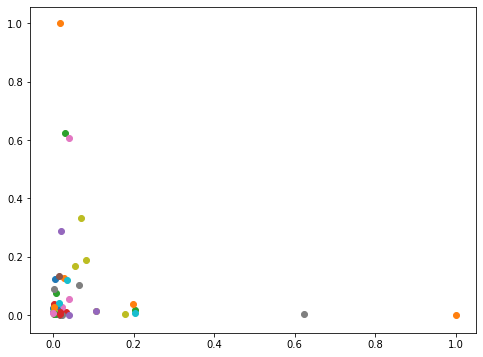

In [49]:
tfis = TFI[["pd_c","buy_am","buy_ct"]]
tfis1 = tfis.merge(PDI[["pd_c","clac_nm1"]])
tfis_group = tfis1.groupby("clac_nm1").mean()[["buy_am","buy_ct"]]
from sklearn.preprocessing import MinMaxScaler
tfis_group[["buy_am","buy_ct"]] = MinMaxScaler().fit_transform(tfis_group[["buy_am","buy_ct"]])
plt.figure(figsize = (8, 6))
for i in range(tfis_group.shape[0]):
    plt.scatter(tfis_group["buy_am"][i],tfis_group["buy_ct"][i])


In [53]:
tfis_group.loc["Baby Foods"][0]

0.002818033764989263

In [48]:
from math import sqrt
def sim_pearson(data, name1, name2):
    sumX=0 
    sumY=0 
    sumPowX=0 
    sumPowY=0 
    sumXY=0 
    count=0
    
    for i in range(2): # i = key
        sumX+=data.loc[name1][i]
        sumY+=data.loc[name2][i]
        sumPowX+=pow(data.loc[name1][i],2)
        sumPowY+=pow(data.loc[name2][i],2)
        sumXY+=data.loc[name1][i]*data.loc[name2][i]
        count+=1
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))
 

def top_match(data, sim_function=sim_pearson):
    li=pd.DataFrame()
    for k in data.index: #딕셔너리를 돌고
        for j in data.index:
            if k==j:
                li.loc[k,j] = 1
            else:
                li.loc[k,j] = sim_function(data,k,j)
    return li
top_match(tfis_group)

,Automotive Products,Baby Foods,Ball Game / Field Sports,Bedding / Handicraft,Beverages,Birth Supplies / Baby Products,Books / Records / Instruments,Canned / Jarred Foods,Cell Phones / Accessories,Chilled Foods,...,Tableware / Cooking Utensils,Tenants / Restaurants,Tobacco,Tools / Safety Supplies,Toy,Travel / Leisure Services,Underwear / Socks and Hosiery / Homewear,Vegetables,Video / Audio System Electronics,Women's Clothing
Automotive Products,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Baby Foods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ball Game / Field Sports,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bedding / Handicraft,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Beverages,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Birth Supplies / Baby Products,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Books / Records / Instruments,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Canned / Jarred Foods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cell Phones / Accessories,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Chilled Foods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>


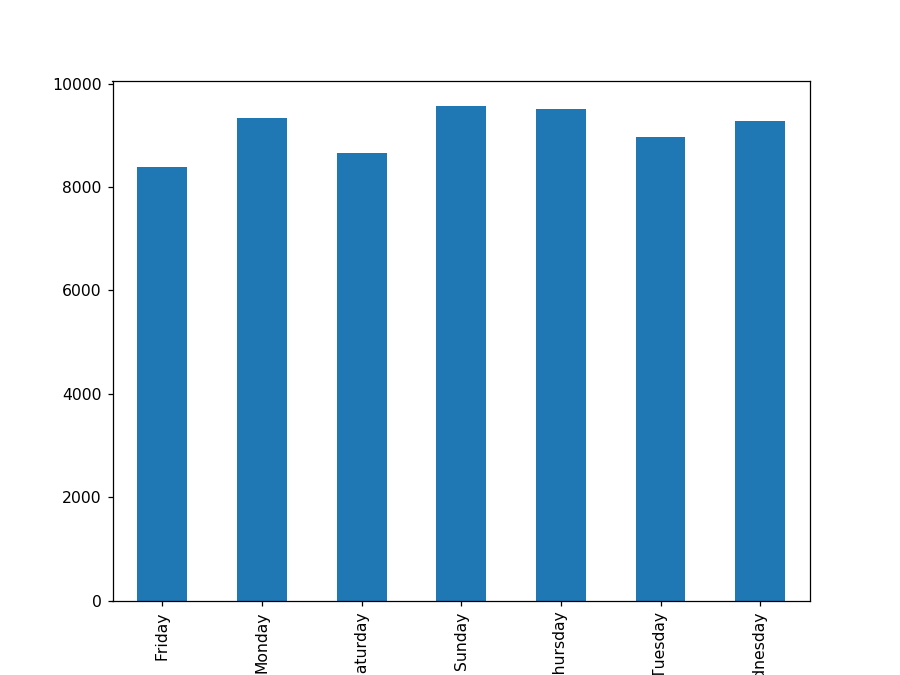

In [56]:
%matplotlib notebook
tf3 = tfi1.groupby("de_dt").sum()["buy_am"]
tf4 = tfi1.groupby("de_dt").sum()["buy_ct"]
tf1 = tfi1.groupby("day_of_week").sum()["buy_ct"]
tf2 = tfi1.groupby("day_of_week").mean()["buy_am"]
plt.figure(figsize = (8, 6))
tf2.plot(kind="bar")


시간별 구매량

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


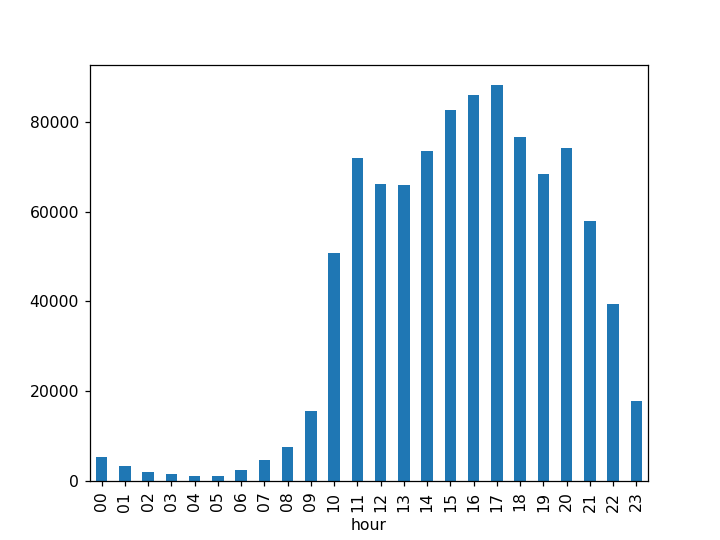

In [22]:
%matplotlib notebook
tfi2 = TFI[["de_tm","buy_am","buy_ct"]]
tfi2['hour'] = (pd.to_datetime(tfi2['de_tm'])).dt.strftime("%H")
buy_am_hour = tfi2.groupby("hour").sum()["buy_ct"]
buy_am_hour.plot(kind='bar')

# 성별/연령대별 선호 품목

In [23]:
merge3 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["clnt_gender","clnt_age","pd_c"]]
merge3 = merge3[merge3["pd_c"]!="unknown"]
merge3["pd_c"] = merge3["pd_c"].astype(np.int32)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [24]:
merge3["count"] = 1
prefer_pivot = pd.pivot_table(merge3, index="pd_c", columns=["clnt_gender","clnt_age"], values='count',aggfunc=np.sum)

In [25]:
a1 = prefer_pivot["F"]["10-20"].sort_values(ascending=False)[1:20].reset_index()
a2 = prefer_pivot["F"]["30"].sort_values(ascending=False)[1:20].reset_index()
a3 = prefer_pivot["F"]["40"].sort_values(ascending=False)[1:20].reset_index()
a4 = prefer_pivot["F"]["50-60"].sort_values(ascending=False)[1:20].reset_index()
a5 = prefer_pivot["M"]["10-20"].sort_values(ascending=False)[1:20].reset_index()
a6 = prefer_pivot["M"]["30"].sort_values(ascending=False)[1:20].reset_index()
a7 = prefer_pivot["M"]["40"].sort_values(ascending=False)[1:20].reset_index()
a8 = prefer_pivot["M"]["50-60"].sort_values(ascending=False)[1:20].reset_index()

In [26]:
a11 = PDI.merge(a1.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a22 = PDI.merge(a2.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a33 = PDI.merge(a3.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a44 = PDI.merge(a4.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a55 = PDI.merge(a5.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a66 = PDI.merge(a6.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a77 = PDI.merge(a7.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a88 = PDI.merge(a8.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a11

,pd_c,clac_nm1
0,109,Beverages
1,114,Beverages
2,347,Dairy Products
3,348,Dairy Products
4,354,Dairy Products
5,526,Frozen Foods
6,565,Fruits
7,864,Kitchenware
8,894,Liquors / Alcoholic Beverages
9,964,Meats


# 검색 대비 구매

In [27]:
oai6 = OAI[OAI["action_type"]==6][["clnt_id","sess_id", "sess_dt","hit_tm","trans_id"]].reset_index(drop=True)
oai0 = OAI[OAI["action_type"]==0][["clnt_id","sess_id", "sess_dt","hit_tm","sech_kwd"]].reset_index(drop=True)

In [29]:
from tqdm import tqdm
pd_c_list = {}
oai6["sech_count"] = 0
for row in tqdm(range(oai6.shape[0])):
    data = oai6.iloc[row,]
    sech = len(oai0[(oai0["clnt_id"]==data["clnt_id"])&(oai0["sess_id"]==data["sess_id"])]["sech_kwd"])
    oai6["sech_count"][row] = oai6["sech_count"][row]+sech

  0%|          | 0/52972 [00:00<?, ?it/s]C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 52972/52972 [06:37<00:00, 133.43it/s]


In [30]:
sech_count = oai6.groupby(["clnt_id","trans_id"]).sum()["sech_count"].reset_index()
sech_count[sech_count==0] = 100000000000

In [31]:
tfi_g = TFI[["clnt_id", "trans_id","pd_c"]]
tfi_g["buy_count"] = 1
tfi_group = pd.pivot_table(tfi_g,index=["clnt_id","trans_id"],values="buy_count",aggfunc=np.sum).reset_index()
tfi_group
merge4 = tfi_group.merge(sech_count,on = ["clnt_id","trans_id"])

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
buy_prop = pd.DataFrame([merge4["clnt_id"],merge4["trans_id"],round((merge4["buy_count"]/merge4["sech_count"]),5)]).T
buy_prop.rename(columns = {"Unnamed 0": "buy_prop"}, inplace = True)
buy_prop1 = buy_prop[buy_prop["buy_prop"]!=0]
buy_prop1

,clnt_id,trans_id,buy_prop
0,2.0,62037.0,0.14286
1,2.0,64691.0,0.45455
2,2.0,65505.0,1.00000
3,2.0,88495.0,1.50000
4,9.0,45242.0,3.00000
6,23.0,55760.0,0.20000
7,24.0,52647.0,1.12500
8,24.0,91159.0,0.41176
10,40.0,86943.0,0.12500
12,40.0,92593.0,0.50000


# 연령별 평균 구매액


In [33]:
merge5 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["trans_id","clnt_gender","clnt_age","buy_am","buy_ct"]]
merge5["buy_price"] = merge5["buy_am"]
buy_group = merge5.groupby(["clnt_gender","clnt_age"]).mean()["buy_price"].reset_index()
buy_group.sort_values(by="buy_price", ascending=False)

,clnt_gender,clnt_age,buy_price
4,M,10-20,22157.462921
5,M,30,15441.910191
6,M,40,12809.131254
7,M,50-60,11330.902544
3,F,50-60,10140.705683
0,F,10-20,8693.187803
2,F,40,8044.662314
1,F,30,7842.136655


# 행동별 세션 시간 페이지수 조회시간경과
문서에 없던건데 제가 착각해서 만들어졌습니다.

In [34]:
oai_time = OAI[["action_type","tot_sess_hr_v","tot_pag_view_ct","hit_pss_tm"]]
oai_time_group = oai_time.groupby("action_type").mean()
oai_time_group

,tot_sess_hr_v,tot_pag_view_ct,hit_pss_tm
action_type,,,
0,1575.548098,59.922414,7.617950e+05
1,1696.614545,43.415442,8.384682e+05
2,1431.795055,32.575797,6.463220e+05
3,1781.768918,43.359020,7.658703e+05
4,1800.859538,47.528228,9.458773e+05
5,1766.242192,47.442589,1.033558e+06
6,1454.902435,46.541991,1.172413e+06


In [65]:
oai_time_group["tot_sess_hr_v"][0]

1575.5480979206643

In [60]:
merge6 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["clnt_id","trans_id","clnt_gender","clnt_age","buy_am","de_dt"]]
merge6[(merge6["clnt_gender"]=="M")|(merge6["clnt_age"]=="10-20")][["clnt_id","trans_id","buy_am","de_dt"]].sort_values(by="buy_am",ascending=False)

,clnt_id,trans_id,buy_am,de_dt
325986,43143,127882,11800000,20190801
325962,43143,84815,10500000,20190826
325961,43143,84804,10500000,20190826
325960,43143,74878,10500000,20190813
262633,63500,65340,10121800,20190808
262635,63500,68266,10121800,20190809
262632,63500,65329,10121800,20190807
262634,63500,68259,10121800,20190810
262631,63500,70312,10121800,20190807
262636,63500,71894,10121800,20190809


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


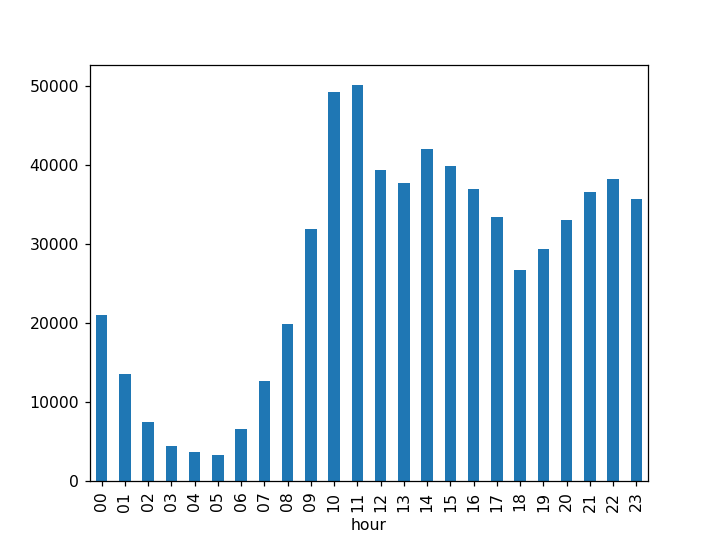

In [64]:
%matplotlib notebook
time_oai = oai0[["hit_tm","sech_kwd"]]
time_oai['hour'] = (pd.to_datetime(time_oai['hit_tm'])).dt.strftime("%H")
time_oai['count'] = 1
sech_time = time_oai.groupby("hour").sum()["count"]
sech_time.plot(kind='bar')

,clnt_id,sess_id,sess_dt,hit_tm,sech_kwd
0,30605,16,20190907,22:04,버터
1,30605,12,20190821,23:36,카누
2,30605,13,20190822,14:47,카누
3,28304,1,20190716,11:36,비비고만두
4,28304,1,20190716,11:35,어묵
5,28304,1,20190716,11:37,고메핫도그
6,28304,1,20190716,11:34,핫도그
7,28304,1,20190716,11:34,어묵
8,28304,1,20190716,11:38,비비고만두
9,43159,1,20190830,21:36,cj


hi
